# Part-(1C) Data Imputed including Feature Selection, Perform Exploratory Analysis with Statistics  and Model Tuned  on Feature Selection

In [190]:
import sys
import pandas as pd
import numpy as np
import scipy as sp
import sklearn

import random
import time

import warnings
warnings.filterwarnings('ignore')

In [191]:
print("Python Version: {}" .format(sys.version))

Python Version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [192]:
print("Pandas Version: {}" .format(pd.__version__))

Pandas Version: 1.0.1


In [193]:
print("Numpy Version: {}" .format(np.__version__))

Numpy Version: 1.18.1


In [194]:
print("SciPy version: {}". format(sp.__version__))

SciPy version: 1.4.1


In [195]:
print("scikit-learn version: {}". format(sklearn.__version__))

scikit-learn version: 0.22.1


In [196]:
print('+'*25)

+++++++++++++++++++++++++


from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

In [197]:
data=pd.read_csv('Titanic_full.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,1,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [198]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process


#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [199]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [200]:
df = pd.DataFrame(data=data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [201]:
df.loc[:,'Pclass']

0       3
1       1
2       3
3       1
4       3
       ..
1304    3
1305    1
1306    3
1307    3
1308    3
Name: Pclass, Length: 1309, dtype: int64

In [202]:
pd.isna(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,True,False,False,False,False,True,False
1305,False,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,True,False
1307,False,False,False,False,False,True,False,False,False,False,True,False


In [203]:
data['Embarked'].fillna( data['Embarked'].mode())

0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: Embarked, Length: 1309, dtype: object

In [204]:
drop_column = ['PassengerId','Cabin', 'Ticket']
data.drop(drop_column,axis=1, inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,0,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
1305,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
1306,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
1307,1,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [205]:
for dataset in data:
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna( data['Fare'].median(), inplace=True)

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1309 non-null   float64
 8   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


In [207]:
for dataset in data:
    data['FamilySize']=data['SibSp'] + data['Parch']
    data['IsAlone']=1
    data['IsAlone'].loc[data['FamilySize']>1]=0
    data['Title']= data['Name'].str.split(",", expand=True)[1].str.split(".",expand=True)[0]
    data['FareBin']=pd.qcut(data['Fare'],4)
    data['AgeBin']=pd.cut(data['Age'].astype(int),5)

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    1309 non-null   int64   
 1   Pclass      1309 non-null   int64   
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   object  
 4   Age         1309 non-null   float64 
 5   SibSp       1309 non-null   int64   
 6   Parch       1309 non-null   int64   
 7   Fare        1309 non-null   float64 
 8   Embarked    1309 non-null   object  
 9   FamilySize  1309 non-null   int64   
 10  IsAlone     1309 non-null   int64   
 11  Title       1309 non-null   object  
 12  FareBin     1309 non-null   category
 13  AgeBin      1309 non-null   category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 125.9+ KB


In [209]:
# cleaning rare titles
stat_min = 10
title_names =(data['Title'].value_counts() <stat_min)
title_names

 Mr              False
 Miss            False
 Mrs             False
 Master          False
 Rev              True
 Dr               True
 Col              True
 Ms               True
 Mlle             True
 Major            True
 Mme              True
 Lady             True
 the Countess     True
 Sir              True
 Capt             True
 Jonkheer         True
 Don              True
 Dona             True
Name: Title, dtype: bool

In [210]:
data['Title'] = data['Title'].map(lambda x: ' Misc' if title_names.loc[x] == True else x)

In [211]:
data['Title'].value_counts()

 Mr        757
 Miss      260
 Mrs       197
 Master     61
 Misc       34
Name: Title, dtype: int64

In [212]:
from sklearn.preprocessing import OrdinalEncoder

#code categorical data
label= OrdinalEncoder()
data_cat=data[['Sex','Embarked','Title', 'AgeBin', 'FareBin']]
data_cat_encoded=label.fit_transform(data_cat)
print(data_cat_encoded.shape)

(1309, 5)


In [213]:
data_new =pd.DataFrame(data_cat_encoded,columns=['Sex_Code','Embarked_Code','Title_Code','AgeBin_Code','FareBin_Code'],
                          index=data_cat.index)

data_new

,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,1.0,2.0,3.0,1.0,0.0
1,0.0,0.0,4.0,2.0,3.0
2,0.0,2.0,2.0,1.0,1.0
3,0.0,2.0,4.0,2.0,3.0
4,1.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...
1304,1.0,2.0,3.0,1.0,1.0
1305,0.0,0.0,1.0,2.0,3.0
1306,1.0,2.0,3.0,2.0,0.0
1307,1.0,2.0,3.0,1.0,1.0


In [214]:
s=[data_new,data]
Pro_Data= pd.concat(s, axis=1)
Pro_Data

,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,1.0,2.0,3.0,1.0,0.0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
1,0.0,0.0,4.0,2.0,3.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,1,Mrs,"(31.275, 512.329]","(32.0, 48.0]"
2,0.0,2.0,2.0,1.0,1.0,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1,Miss,"(7.896, 14.454]","(16.0, 32.0]"
3,0.0,2.0,4.0,2.0,3.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,1,Mrs,"(31.275, 512.329]","(32.0, 48.0]"
4,1.0,2.0,3.0,2.0,1.0,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1,Mr,"(7.896, 14.454]","(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0,2.0,3.0,1.0,1.0,0,3,"Spector, Mr. Woolf",male,28.0,0,0,8.0500,S,0,1,Mr,"(7.896, 14.454]","(16.0, 32.0]"
1305,0.0,0.0,1.0,2.0,3.0,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,0,1,Misc,"(31.275, 512.329]","(32.0, 48.0]"
1306,1.0,2.0,3.0,2.0,0.0,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,0,1,Mr,"(-0.001, 7.896]","(32.0, 48.0]"
1307,1.0,2.0,3.0,1.0,1.0,1,3,"Ware, Mr. Frederick",male,28.0,0,0,8.0500,S,0,1,Mr,"(7.896, 14.454]","(16.0, 32.0]"


In [215]:
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']


In [216]:
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']


In [217]:
Target=['Survived']

In [218]:
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
data1_xy_bin

['Survived',
 'Sex_Code',
 'Pclass',
 'Embarked_Code',
 'Title_Code',
 'FamilySize',
 'AgeBin_Code',
 'FareBin_Code']

In [219]:
data1_dummy=pd.get_dummies(Pro_Data[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy

In [220]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Misc,Title_ Miss,Title_ Mr,Title_ Mrs
0,3,1,0,22.0,7.2500,1,1,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,1,1,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,0,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,1,1,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,0,1,0,1,0,0,1,0,0,0,1,0


In [221]:
from sklearn.model_selection import train_test_split

train1_x, test1_x, train1_y, test1_y = train_test_split(Pro_Data[data1_x_calc], Pro_Data[Target], random_state = 0)

In [222]:
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = train_test_split(Pro_Data[data1_x_bin], Pro_Data[Target] , random_state = 0)

In [223]:
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = train_test_split(data1_dummy[data1_x_dummy], Pro_Data[Target], random_state = 0)

In [224]:
print("Pro_Data Shape: {}".format(Pro_Data.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

Pro_Data Shape: (1309, 19)
Train1 Shape: (981, 8)
Test1 Shape: (328, 8)


In [225]:
for x in data1_x:
    if Pro_Data[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(Pro_Data[[x,Target[0]]].groupby(x,as_index=False).mean())

Survival Correlation by: Sex
      Sex  Survived
0  female   0.61588
1    male   0.25860
Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.532508
1       2  0.458484
2       3  0.290550
Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.481481
1        Q  0.422764
2        S  0.352620
Survival Correlation by: Title
     Title  Survived
0   Master  0.508197
1     Misc  0.411765
2     Miss  0.592308
3       Mr  0.240423
4      Mrs  0.629442
Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.367003
1      1  0.457680
2      2  0.500000
3      3  0.350000
4      4  0.181818
5      5  0.000000
6      8  0.000000
Survival Correlation by: Parch
   Parch  Survived
0      0  0.366267
1      1  0.505882
2      2  0.415929
3      3  0.500000
4      4  0.000000
5      5  0.166667
6      6  0.000000
7      9  0.000000
Survival Correlation by: FamilySize
   FamilySize  Survived
0           0  0.340506
1           1  0.497872
2           2  0.503145
3      

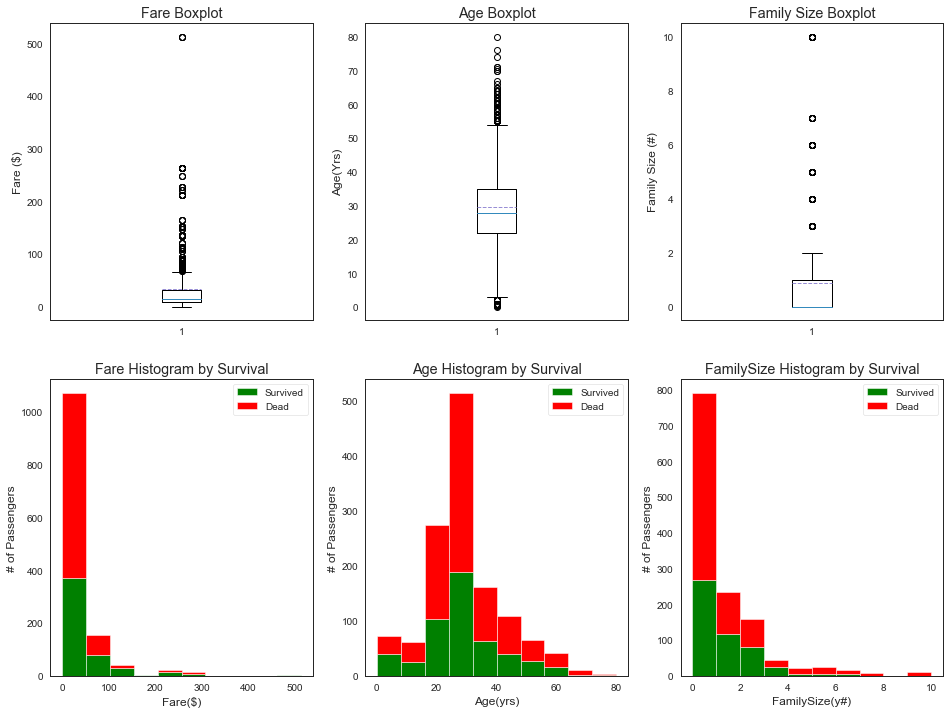

In [226]:
#graph distribution of quantitative data
import matplotlib.pyplot as plt
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=Pro_Data['Fare'], showmeans= True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(234)
plt.hist(x = [Pro_Data[Pro_Data['Survived']==1]['Fare'], Pro_Data[Pro_Data['Survived']==0]['Fare']], stacked= True, color=['g','r'], label=['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare($)')
plt.ylabel('# of Passengers')
plt.legend()


plt.subplot(232)
plt.boxplot(x=Pro_Data['Age'], showmeans =True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age(Yrs)')

plt.subplot(235)
plt.hist(x = [Pro_Data[Pro_Data['Survived']==1]['Age'], Pro_Data[Pro_Data['Survived']==0]['Age']], stacked= True, color=['g','r'], label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age(yrs)')
plt.ylabel('# of Passengers')
plt.legend()


plt.subplot(233)
plt.boxplot(Pro_Data['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')


plt.subplot(236)
plt.hist(x = [Pro_Data[Pro_Data['Survived']==1]['FamilySize'], Pro_Data[Pro_Data['Survived']==0]['FamilySize']], stacked= True, color=['g','r'], label=['Survived', 'Dead'])
plt.title('FamilySize Histogram by Survival')
plt.xlabel('FamilySize(y#)')
plt.ylabel('# of Passengers')
plt.legend()

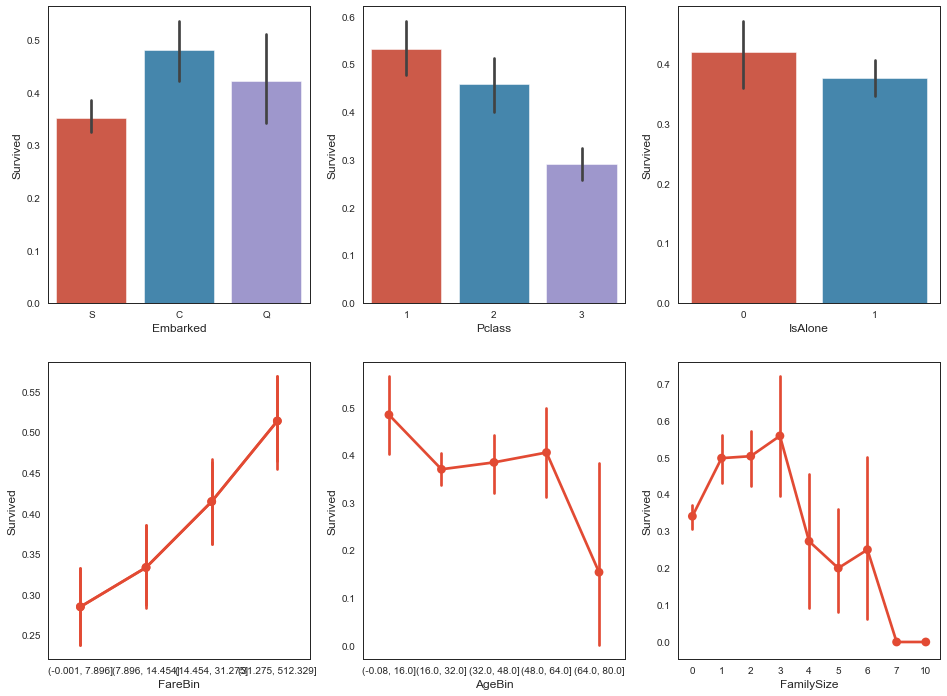

In [227]:
fig, saxis =plt.subplots(2,3,figsize=(16,12))
sns.barplot (x='Embarked',y='Survived', data=Pro_Data, ax= saxis[0,0])

sns.barplot (x='Pclass',y='Survived', data=Pro_Data, ax= saxis[0,1])

sns.barplot (x='IsAlone',y='Survived', data=Pro_Data, ax= saxis[0,2])

sns.pointplot (x='FareBin',y='Survived', data=Pro_Data, ax= saxis[1,0])

sns.pointplot (x='FareBin',y='Survived', data=Pro_Data, ax= saxis[1,0])

sns.pointplot (x='AgeBin',y='Survived', data=Pro_Data, ax= saxis[1,1])

sns.pointplot (x='FamilySize',y='Survived', data=Pro_Data, ax= saxis[1,2])

Text(0.5, 1.0, 'Pclass vs FamilySize Survival Comparison')

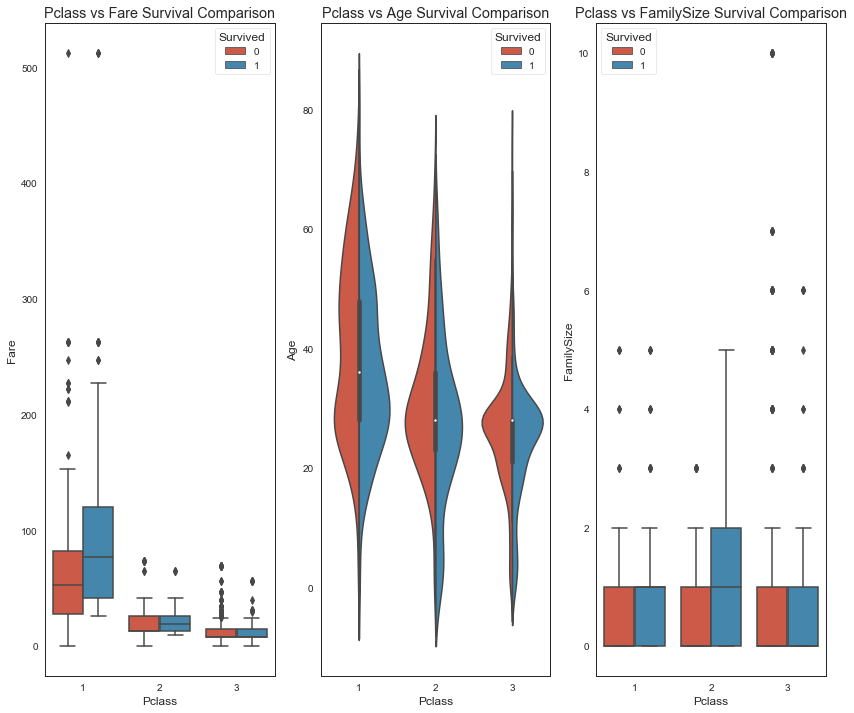

In [228]:
#graph distribution of qualitative data: Pclass

fig,(axis1, axis2, axis3) = plt.subplots(1,3, figsize=(14,12))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=Pro_Data, ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=Pro_Data,split = True, ax=axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x='Pclass', y='FamilySize', hue='Survived', data=Pro_Data, ax=axis3)
axis3.set_title('Pclass vs FamilySize Survival Comparison')

Text(0.5, 1, 'Sex vs IsAlone Survival Comparison')

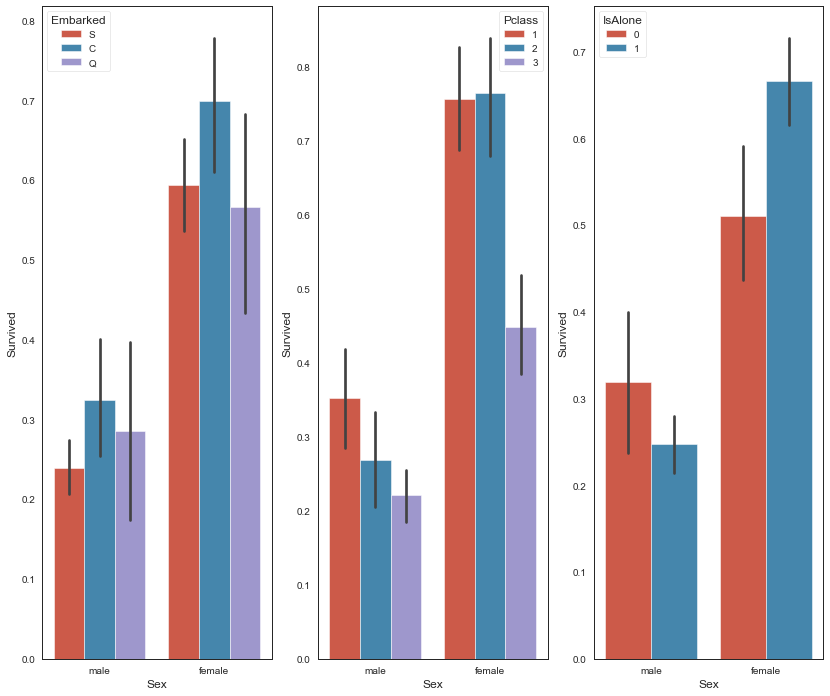

In [229]:
#graph distribution of qualitative data: Sex

fiq, qaxis =plt.subplots(1,3,figsize=(14,12))

sns.barplot(x='Sex', y='Survived', hue='Embarked', data=Pro_Data, ax=qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Pro_Data, ax=qaxis[1])
axis2.set_title('Sex vs Pclass Survival Comparison')


sns.barplot(x='Sex', y='Survived', hue='IsAlone', data=Pro_Data, ax=qaxis[2])
axis3.set_title('Sex vs IsAlone Survival Comparison')

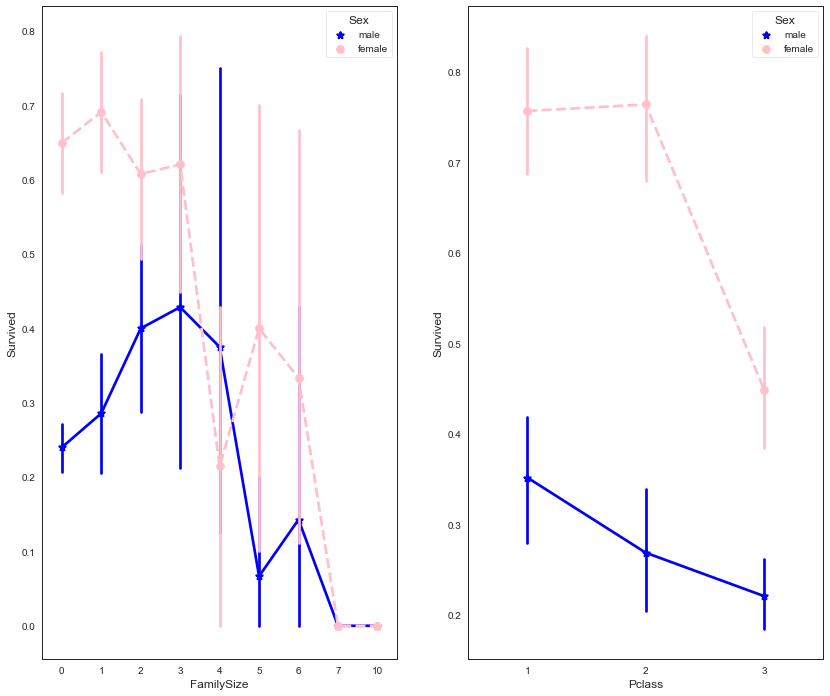

In [230]:
#more side-by-side comparisons
#how does family size factor with sex & survival compare
fiq, (maxis1, maxis2)=plt.subplots(1,2,figsize=(14,12))

sns.pointplot(x='FamilySize',y='Survived', hue='Sex', data=Pro_Data,
             palette={'male':'blue','female':'pink'},markers=['*','o'],
             linestyles=['-','--'], ax=maxis1)

#how does class factor with sex & survival compare

sns.pointplot(x='Pclass',y='Survived', hue='Sex', data=Pro_Data,
             palette={'male':'blue','female':'pink'},markers=['*','o'],
             linestyles=['-','--'], ax=maxis2)

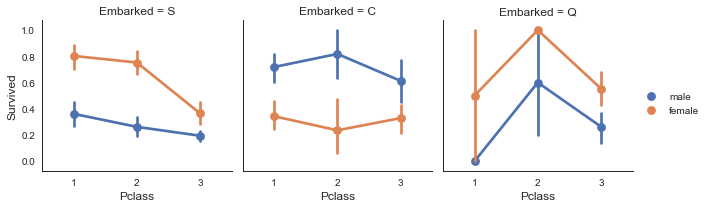

In [231]:
#how does embark port factor with class, sex, and survival compare
e=sns.FacetGrid(Pro_Data, col='Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived','Sex', palette='deep')
e.add_legend()

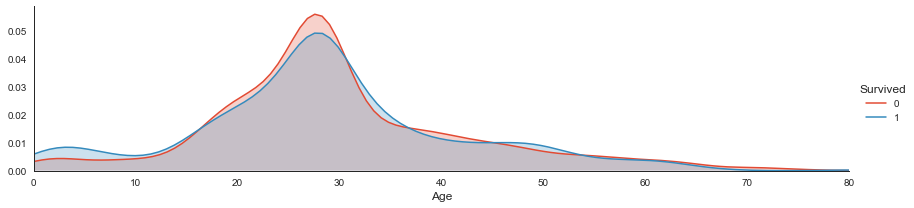

In [232]:
#plot distributions of age of passengers who survived or did not survive
a=sns.FacetGrid(Pro_Data,hue='Survived', aspect=4)
a.map(sns.kdeplot,'Age', shade=True)
a.set(xlim=(0,Pro_Data['Age'].max()))
a.add_legend()

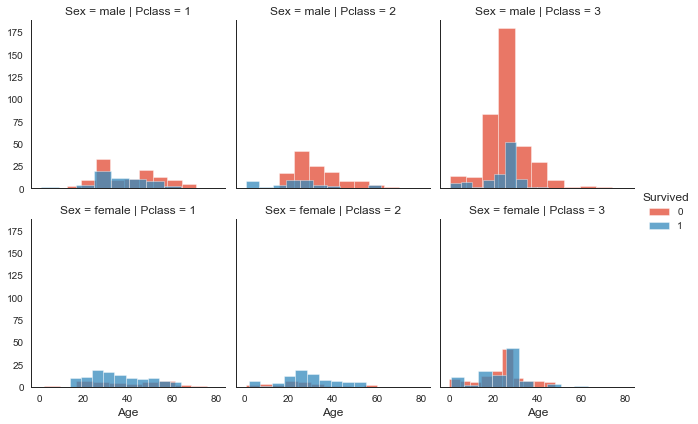

In [233]:
#histogram comparison of sex, class, and age by survival
h=sns.FacetGrid(Pro_Data, row='Sex', col='Pclass',hue='Survived')
h.map(plt.hist,'Age',alpha= .75)
h.add_legend()

In [234]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis()
    
    ]

In [235]:
#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

In [236]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_predict = Pro_Data[Target]

In [237]:
from sklearn.model_selection import cross_validate
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    cv_results = cross_validate(alg, Pro_Data[data1_x_bin], Pro_Data[Target], cv  = cv_split, return_train_score=True)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    alg.fit(Pro_Data[data1_x_bin], Pro_Data[Target])
    MLA_predict[MLA_name] = alg.predict(Pro_Data[data1_x_bin])
    row_index+=1

#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.739618,0.715522,0.0598933,0.16194
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.768535,0.715013,0.0565092,0.196241
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.782166,0.709669,0.0469884,0.231228
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.734395,0.708906,0.0462069,0.138836
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.78242,0.704071,0.0558923,1.09501
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.726497,0.7,0.0271931,0.00323007
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.818344,0.7,0.0568638,0.297828
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.71465,0.698982,0.053983,0.0589766
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.71414,0.69771,0.0489741,0.00685239
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.714013,0.697455,0.0557252,0.00607553


Text(0, 0.5, 'Algorithm')

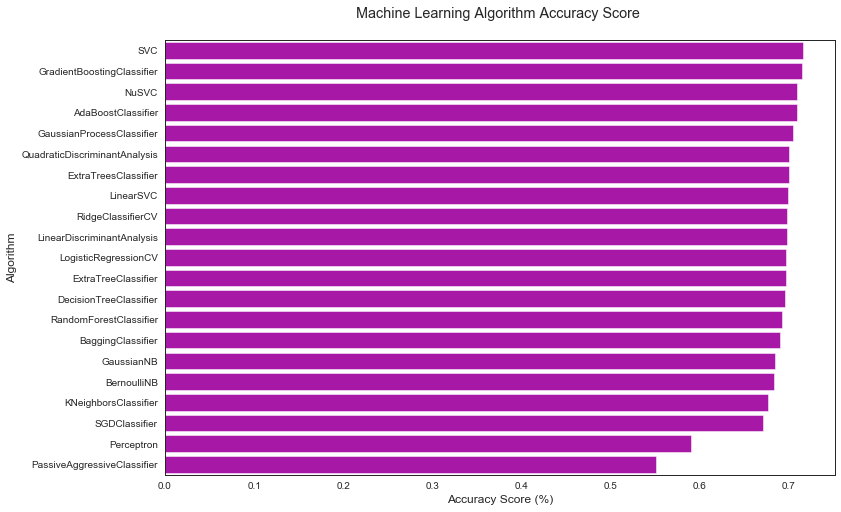

In [238]:
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

# Part2B: Gradient Boosting Implementation on part1C preprocessed data

In [239]:
gbrt = ensemble.GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 7)
gbrt.fit(train1_x_bin, train1_y_bin)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [240]:
from sklearn.metrics import accuracy_score
y_prd = gbrt.predict(test1_x_bin)
accuracy_score(test1_y_bin, y_prd.round())

0.6737804878048781

In [241]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
print("Confusion Matrix:")
print(confusion_matrix(test1_y_bin, y_prd))
print()
print("Classification Report")
print(classification_report(test1_y_bin, y_prd))

Confusion Matrix:
[[132  43]
 [ 64  89]]

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       175
           1       0.67      0.58      0.62       153

    accuracy                           0.67       328
   macro avg       0.67      0.67      0.67       328
weighted avg       0.67      0.67      0.67       328



In [242]:
# ROC curve and Area-Under-Curve (AUC)

y_scores_gb = gbrt.decision_function(test1_x_bin)
fpr_gb, tpr_gb, _ = roc_curve(test1_y_bin, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.73


# Evaluating test set accuracy with the trained model after doing HyperParameter Tuning

In [243]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_test_accuracy_score =[]
for learning_rate in learning_rates:
    for estimator in n_estimators:
        gb = GradientBoostingClassifier(n_estimators=estimator, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
        gb.fit(train1_x_bin, train1_y_bin)
        print("Learning rate: ", learning_rate)
        print("n_estimators: ", estimator)
        print("Accuracy score (training): {0:.3f}".format(gb.score(train1_x_bin, train1_y_bin)))
        print("Accuracy score (testing): {0:.3f}".format(gb.score(test1_x_bin, test1_y_bin)))
        max_test_accuracy_score.append(gb.score(test1_x_bin, test1_y_bin))
        print()
        

Learning rate:  0.05
n_estimators:  1
Accuracy score (training): 0.641
Accuracy score (testing): 0.534

Learning rate:  0.05
n_estimators:  2
Accuracy score (training): 0.641
Accuracy score (testing): 0.534

Learning rate:  0.05
n_estimators:  4
Accuracy score (training): 0.641
Accuracy score (testing): 0.534

Learning rate:  0.05
n_estimators:  8
Accuracy score (training): 0.641
Accuracy score (testing): 0.534

Learning rate:  0.05
n_estimators:  16
Accuracy score (training): 0.669
Accuracy score (testing): 0.558

Learning rate:  0.05
n_estimators:  32
Accuracy score (training): 0.723
Accuracy score (testing): 0.686

Learning rate:  0.05
n_estimators:  64
Accuracy score (training): 0.737
Accuracy score (testing): 0.689

Learning rate:  0.05
n_estimators:  100
Accuracy score (training): 0.751
Accuracy score (testing): 0.695

Learning rate:  0.05
n_estimators:  200
Accuracy score (training): 0.751
Accuracy score (testing): 0.695

Learning rate:  0.1
n_estimators:  1
Accuracy score (trai

In [244]:
np.argmax(max_test_accuracy_score)

16

In [247]:
gbrt_best = GradientBoostingClassifier(max_depth=2,n_estimators=32,learning_rate = 0.25, random_state=7) 
gbrt_best.fit(train1_x_bin, train1_y_bin)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=32,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [248]:
y_prd = gbrt_best.predict(test1_x_bin)

In [249]:
Validation_acc= accuracy_score(test1_y_bin, y_prd.round())
Validation_acc

0.698170731707317

In [250]:
# ROC curve and Area-Under-Curve (AUC)

y_scores_gb = gbrt_best.decision_function(test1_x_bin)
fpr_gb, tpr_gb, _ = roc_curve(test1_y_bin, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.75


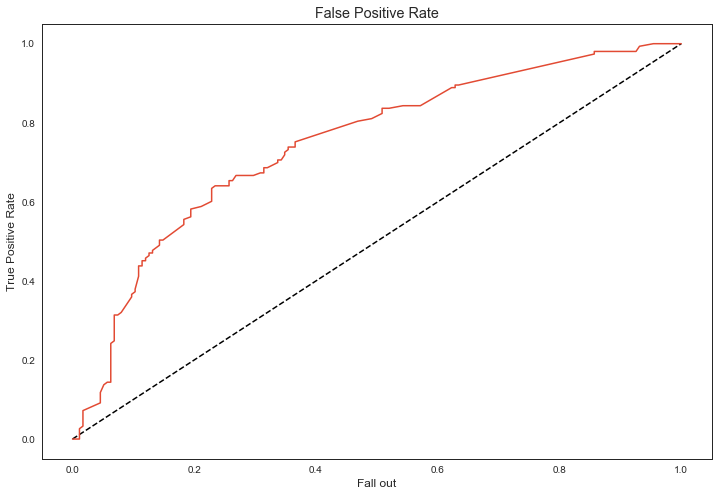

In [251]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_gb,tpr_gb, label='GB')
plt.xlabel('Fall out')
plt.ylabel('True Positive Rate')
plt.title('False Positive Rate')
plt.show()

# Part3: Evaluating increasing the number of decision trees (n_estimators), increases classifier performance and/or generalizability.

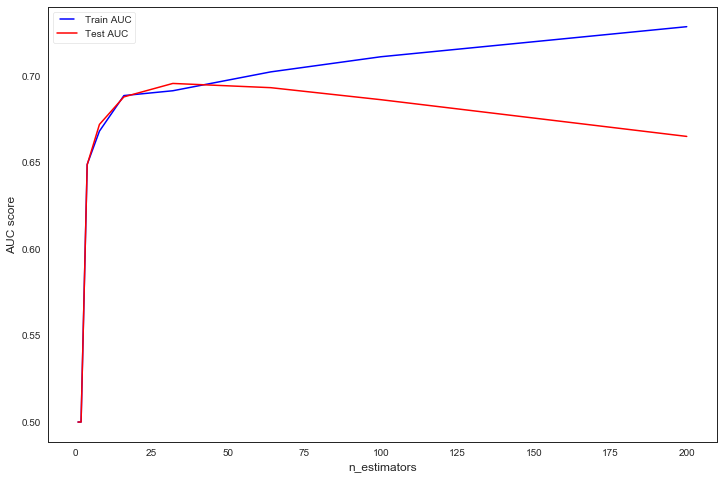

In [252]:
from matplotlib.legend_handler import HandlerLine2D

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
valid_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(train1_x_bin, train1_y_bin)
    
    train_pred=model.predict(train1_x_bin)
    fpr, tpr, thresholds= roc_curve(train1_y_bin,train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    
    
    y_pred=model.predict(test1_x_bin)
    fpr_v, tpr_v, thresholds= roc_curve(test1_y_bin,y_pred)
    roc_auc_v = auc(fpr_v, tpr_v)
    valid_results.append(roc_auc_v)
    
  
line1, =plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, =plt.plot(n_estimators, valid_results, 'r', label="Test AUC")


plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

# Hence increasing the number of estimators may result in overfitting also. In our case, using 32 trees is optimal